In [2]:
## 98273 Data Mining Coursework
## We are going to apply Data Mining algorithms to
## the above dataset to investigate insights regarding to it
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlxtend as mlx
import sys
import altair as alt
from altair import datum
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from matplotlib_venn import venn3
from matplotlib_venn import venn2
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
# Data read and data preprocessing
m_data = pd.read_csv('OnlineRetail.csv')
m_data['Description'] = m_data['Description'].str.strip()
m_data = m_data.dropna(axis =0)
m_data['InvoiceNo'] = m_data['InvoiceNo'].astype('str')
# We are making the description to lower case for massive managing
m_data['Description'] = m_data['Description'].str.lower()
# we are going to convert column names to lower as well
m_data.columns = m_data.columns.str.lower()
m_data['description'] = m_data['description'].astype('str')
m_data = m_data[~m_data['description'].str.contains('wrongly')]
m_data['customerid'] = m_data['customerid'].astype('int')
m_data = m_data[~m_data['description'].str.contains('postage')]
m_data = m_data[m_data['quantity']>0]

In [4]:
m_data.head(5)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,white hanging heart t-light holder,6,01/12/2010 08:26,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,01/12/2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,01/12/2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,01/12/2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,01/12/2010 08:26,3.39,17850,United Kingdom


In [5]:
#Encoding function to create the apriori sets for associated mining rule
def encode(x):
    if (x <= 0):
        return 0
    elif (x >= 1):
        return 1


Text(0, 0.5, 'Total Count')

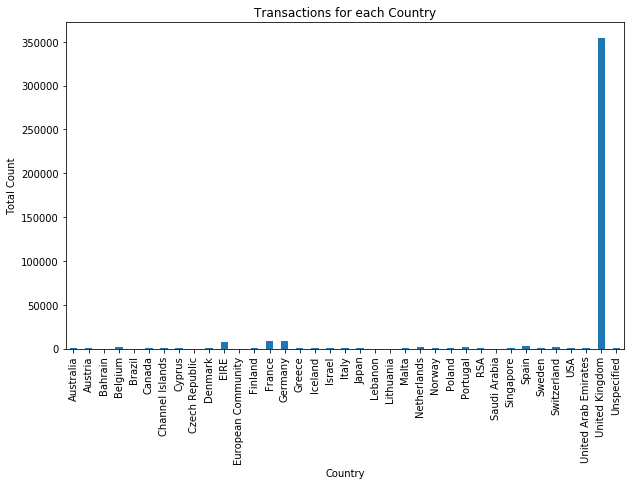

In [6]:
plt.figure(figsize=[10,6])
m_data.groupby('country').size().plot(kind='bar')
plt.title('Transactions for each Country')
plt.xlabel('Country');plt.ylabel('Total Count')

We are going to create 4 different baskets from the countries that had the highest amount of transcactions.
Thus, we are going to create baskets for France, Germany, United Kingdom and EIRE

In [7]:
# From the documentation of Mlxtend
basket_france = (m_data[m_data['country'] =="France"]
          .groupby(['invoiceno', 'description'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoiceno'))

basket_germany = (m_data[m_data['country'] =="Germany"]
          .groupby(['invoiceno', 'description'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoiceno'))

basket_eire = (m_data[m_data['country'] =="EIRE"]
          .groupby(['invoiceno', 'description'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoiceno'))

basket_uk = (m_data[m_data['country'] =="United Kingdom"]
          .groupby(['invoiceno', 'description'])['quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('invoiceno'))


basket_france = basket_france.applymap(encode)
basket_eire = basket_eire.applymap(encode)
basket_germany = basket_germany.applymap(encode)
basket_uk = basket_uk.applymap(encode)

Frequent Itemsets for each basket

In [8]:
frequent_itemsets_ger = apriori(basket_germany, min_support=0.05, use_colnames=True)
frequent_itemsets_uk = apriori(basket_uk, min_support=0.02, use_colnames=True)
frequent_itemsets_fra = apriori(basket_france, min_support=.05, use_colnames=True)
frequent_itemsets_eire = apriori(basket_eire, min_support=.05, use_colnames=True)

Apply the association rules for each basket

In [9]:
uk_rules = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=1)
eire_rules = association_rules(frequent_itemsets_eire, metric="lift", min_threshold=1)
fra_rules = association_rules(frequent_itemsets_fra, metric="lift", min_threshold=1)
ger_rules = association_rules(frequent_itemsets_ger, metric="lift", min_threshold=1)

In [10]:
uk_set = set(uk_rules['antecedents'])
eire_set = set(eire_rules['antecedents'])
fra_set = set(fra_rules['antecedents'])

We want to distinct each basket of each market therefore, we are creating a column to show the country and we transform our rules from itemsets to pure text to produce visualizations

In [11]:
uk_rules['country'] = 'United Kingdom'
ger_rules['country'] = 'Germany'
eire_rules['country'] = 'EIRE'
fra_rules['country'] = 'France'

# Order of antecedents and consequents
uk_rules['ante_len'] =  uk_rules['antecedents'].apply(lambda x: len(x))
uk_rules['conse_len'] = uk_rules['consequents'].apply(lambda x: len(x))
fra_rules['ante_len'] =  fra_rules['antecedents'].apply(lambda x: len(x))
fra_rules['conse_len'] = fra_rules['consequents'].apply(lambda x: len(x))
ger_rules['ante_len'] =  ger_rules['antecedents'].apply(lambda x: len(x))
ger_rules['conse_len'] = ger_rules['consequents'].apply(lambda x: len(x))
eire_rules['ante_len'] =  eire_rules['antecedents'].apply(lambda x: len(x))
eire_rules['conse_len'] = eire_rules['consequents'].apply(lambda x: len(x))

uk_rules["antecedents"] = uk_rules['antecedents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
uk_rules['consequents'] = uk_rules['consequents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
eire_rules["antecedents"] = eire_rules['antecedents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
eire_rules['consequents'] = eire_rules['consequents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
ger_rules["antecedents"] = ger_rules['antecedents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
ger_rules['consequents'] = ger_rules['consequents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
fra_rules["antecedents"] = fra_rules['antecedents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
fra_rules['consequents'] = fra_rules['consequents'].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [12]:
# Merging the dataframes to be 1 large dataframe
# for better manipulation and visualizations
merged_rules = pd.concat([uk_rules,ger_rules,fra_rules,eire_rules],ignore_index=True)
merged_rules['relation'] = merged_rules['antecedents'] + ' -> ' + merged_rules['consequents']
merged_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,country,ante_len,conse_len,relation
0,alarm clock bakelike green,alarm clock bakelike red,0.041486,0.045575,0.027297,0.657971,14.437169,0.025406,2.790480,United Kingdom,1,1,alarm clock bakelike green -> alarm clock bake...
1,alarm clock bakelike red,alarm clock bakelike green,0.045575,0.041486,0.027297,0.598945,14.437169,0.025406,2.389978,United Kingdom,1,1,alarm clock bakelike red -> alarm clock bakeli...
2,gardeners kneeling pad keep calm,gardeners kneeling pad cup of tea,0.044613,0.037698,0.027537,0.617251,16.373386,0.025855,2.514182,United Kingdom,1,1,gardeners kneeling pad keep calm -> gardeners ...
3,gardeners kneeling pad cup of tea,gardeners kneeling pad keep calm,0.037698,0.044613,0.027537,0.730463,16.373386,0.025855,3.544543,United Kingdom,1,1,gardeners kneeling pad cup of tea -> gardeners...
4,green regency teacup and saucer,pink regency teacup and saucer,0.036797,0.029642,0.024291,0.660131,22.270373,0.023200,2.855093,United Kingdom,1,1,green regency teacup and saucer -> pink regenc...


In [13]:
# Saving our data in a different file
# and we load them again so we can save time
# from both us and a potentiall reader of the demo code
merged_rules.to_csv(path_or_buf = 'rules.csv',index=True)

## Checkpoint
#### You can start from here if you want to skip the rules calculation

In [14]:
# Read the dataset of rules in case we do not want to run the above code 
# Which calculates the association rules
merged_rules = pd.read_csv('rules.csv')

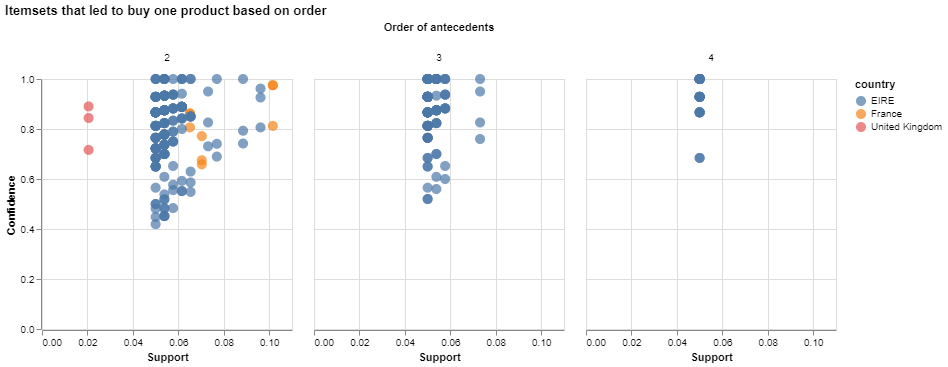

In [15]:
#Producing a visualization between orders and countries
# Order means how many antecedents have been used in a rule to lead to another item
# For instance, Teacup and Tea plate led to Cake thus the antececedent order is 2


three_to_1 = merged_rules[(merged_rules['ante_len'] >=2) & (merged_rules['conse_len'] ==1 )]

alt.Chart(three_to_1).mark_circle(size = 100).encode(
    alt.X('support:Q', axis = alt.Axis(title = 'Support')),
    alt.Y('confidence:Q', axis = alt.Axis(title = 'Confidence')),
    column = alt.Column('ante_len:N', title = 'Order of antecedents'),
    color = ('country:N'),
    tooltip = ['relation']
).properties(width = 250,
            height = 250,
            title = 'Itemsets that led to buy one product based on order')


In [16]:
check_df = merged_rules[(merged_rules['confidence'] > .7)&(merged_rules['lift'] >10)]
check_df = check_df.sort_values(["lift", "confidence"], ascending = (False, False)).head(10).reset_index()

for i in range(0,10):
    print(check_df['antecedents'][i]+' led to '+'\n'+check_df['consequents'][i])

roses regency teacup and saucer, pink regency teacup and saucer led to 
green regency teacup and saucer
roses regency teacup and saucer, green regency teacup and saucer led to 
pink regency teacup and saucer
pink regency teacup and saucer led to 
green regency teacup and saucer
green regency teacup and saucer, pink regency teacup and saucer led to 
roses regency teacup and saucer
green regency teacup and saucer led to 
roses regency teacup and saucer
roses regency teacup and saucer led to 
green regency teacup and saucer
pink regency teacup and saucer led to 
roses regency teacup and saucer
regency cakestand 3 tier, roses regency teacup and saucer, regency tea plate pink led to 
pink regency teacup and saucer, regency tea plate green
pink regency teacup and saucer, regency tea plate green led to 
regency cakestand 3 tier, roses regency teacup and saucer, regency tea plate pink
gardeners kneeling pad cup of tea led to 
gardeners kneeling pad keep calm


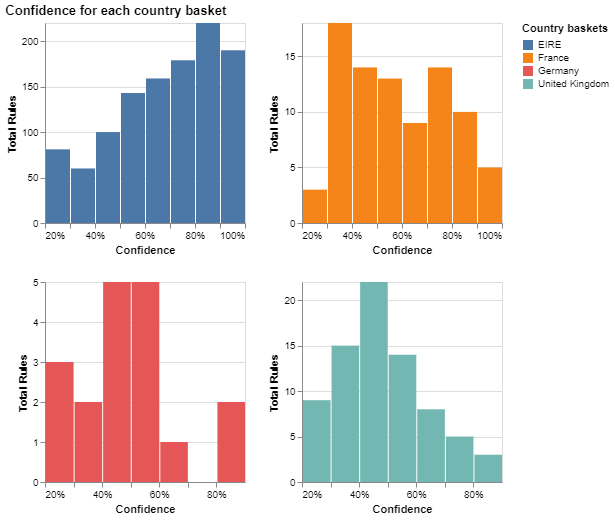

In [17]:
base = alt.Chart(merged_rules).mark_bar().encode(
    x=alt.X('confidence:Q', bin=True, axis=alt.Axis(format='%', title='Confidence')),
    y= alt.Y('count():Q', axis = alt.Axis(title = 'Total Rules')),
    color= alt.Color('country:N', legend=alt.Legend(title="Country baskets")),
).properties(
    width=200,
    height=200,
)


chart = alt.hconcat()
chart2 = alt.hconcat()
x = 0
for country in ['EIRE', 'France']:
    chart |= base.transform_filter(datum.country == country)
for country in ['Germany','United Kingdom']:
    chart2 |= base.transform_filter(datum.country == country)

(chart & chart2).properties(title = 'Confidence for each country basket')

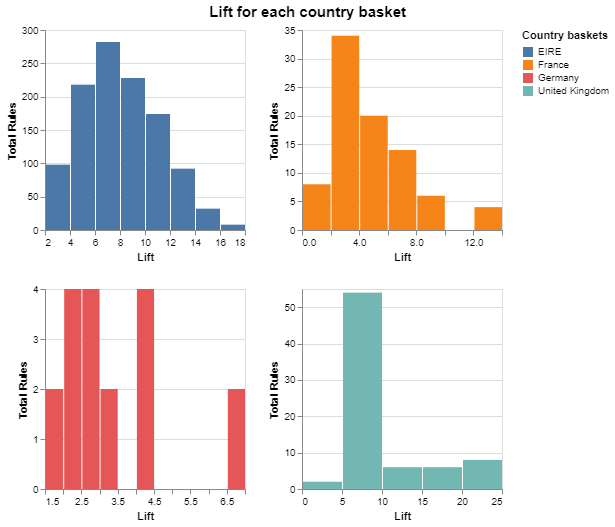

In [18]:
base = alt.Chart(merged_rules).mark_bar().encode(
    x=alt.X('lift:Q', bin=True, axis=alt.Axis(title='Lift')),
    y= alt.Y('count():Q', axis = alt.Axis(title = 'Total Rules')),
    color= alt.Color('country:N', legend=alt.Legend(title="Country baskets")),
).properties(
    width=200,
    height=200,
)


chart = alt.hconcat()
chart2 = alt.hconcat()
x = 0
for country in ['EIRE', 'France']:
    chart |= base.transform_filter(datum.country == country)
for country in ['Germany','United Kingdom']:
    chart2 |= base.transform_filter(datum.country == country)

(chart & chart2).properties(title = 'Lift for each country basket').configure_title(anchor = 'middle', fontSize = 15)

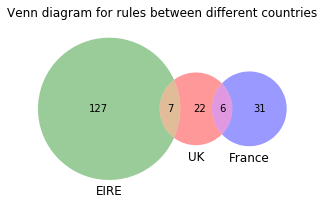

In [19]:
plt.figure(figsize=[5,5])
venn3([uk_set, eire_set, fra_set], 
      set_labels = ('UK','EIRE','France'))
plt.title('Venn diagram for rules between different countries')
plt.show()

In [20]:
uk_set_conf = set(uk_rules[uk_rules['confidence'] > .55]['antecedents'])
eire_set_conf = set(eire_rules[eire_rules['confidence'] > .55]['antecedents'])
fra_set_conf = set(fra_rules[fra_rules['confidence'] > 0.55]['antecedents'])

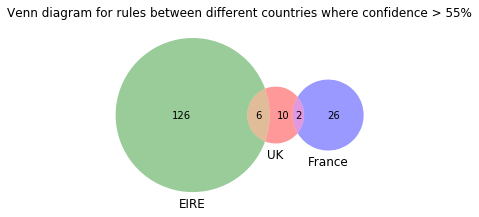

In [21]:
plt.figure(figsize=[5,5])
venn3([uk_set_conf, eire_set_conf, fra_set_conf], 
      set_labels = ('UK','EIRE','France'))
plt.title('Venn diagram for rules between different countries where confidence > 55%')
plt.show()

In [22]:
uk = alt.Chart(merged_rules[merged_rules['country'] == 'United Kingdom']).mark_circle(size=125).encode(
    alt.X('support:Q'),
    alt.Y('confidence:Q'),
    color = alt.Color('lift:Q', scale = alt.Scale(scheme = 'purplered')),
    tooltip = 'relation:N'
).properties(
    width = 250,
    height = 250,
    title = 'United Kingdom'
).interactive()


eire = alt.Chart(merged_rules[merged_rules['country'] == 'EIRE']).mark_circle(size =125).encode(
    alt.X('support:Q'),
    alt.Y('confidence:Q'),
    alt.Color('lift:Q', scale = alt.Scale(scheme = 'purplered')),
    tooltip = 'relation:N',
).properties(
    width = 250,
    height = 250,
    title = 'EIRE'
).resolve_scale(color = 'independent').interactive()

france = alt.Chart(merged_rules[merged_rules['country'] == 'France']).mark_circle(size=125).encode(
    alt.X('support:Q'),
    alt.Y('confidence:Q'),
    alt.Color('lift:Q', scale = alt.Scale(scheme = 'purplered')),
    tooltip = 'relation:N',
).properties(
    width = 250,
    height = 250,
    title = 'France'
).interactive()

germany = alt.Chart(merged_rules[merged_rules['country'] == 'Germany']).mark_circle(size=125).encode(
    alt.X('support:Q'),
    alt.Y('confidence:Q'),
    alt.Color('lift:Q', scale = alt.Scale(scheme = 'purplered')),
    tooltip = 'relation:N'
).properties(
    width = 250,
    height = 250,
    title = 'Germany'
).interactive()

Use mouse wheel to zoom in and out and navigate around the chart by holding left-click (right hander's mouse) to find interesting rules 

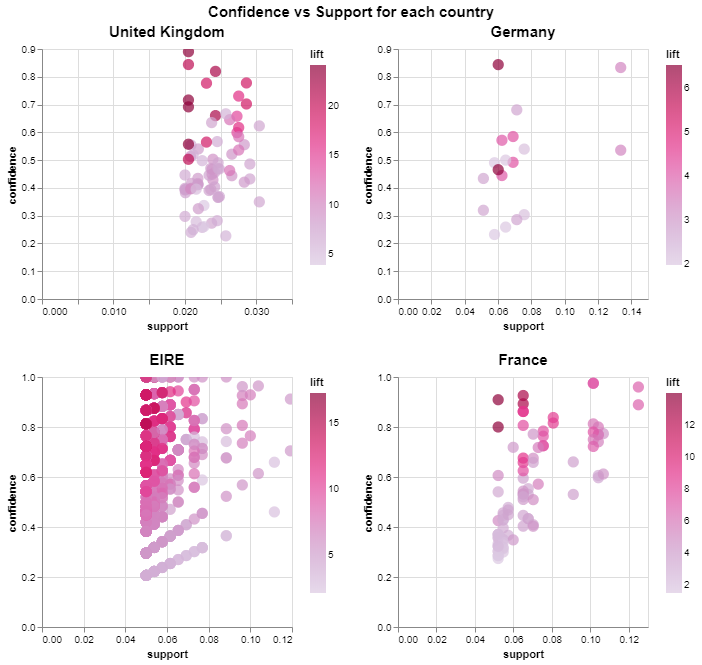

In [23]:
((uk | germany).resolve_scale(color = 'independent') & (eire | france).resolve_scale(color = 'independent')).properties(
    title = 'Confidence vs Support for each country').configure_title(fontSize=15, orient='top', anchor='middle')

In [24]:
# ============================================================
# extracting day, month and year out of each transaction
# based on the invoice date column
# we know that invoice date has a certain format
# so we take advantage of it by using the index of each respective element that we need
# ============================================================
def month(string):
    return int(string[3:5])
def day(string):
    return int(string[0:2])
def year(string):
    return int(string[6:10])

In [25]:
m_data['month'] = m_data['invoicedate'].apply(month)
m_data['day'] = m_data['invoicedate'].apply(day)
m_data['year'] = m_data['invoicedate'].apply(year)

In [26]:
customers =  m_data.groupby(['customerid']).mean()
customers['total_purchases'] = m_data.groupby('customerid').count()['invoiceno']
customers['day'] = m_data.groupby('customerid').median()['day']
customers['month'] = m_data.groupby('customerid').median()['month']
customers['year'] = m_data.groupby('customerid').median()['year']
customers['day'] = customers['day'].apply(round)
customers['month'] = customers['month'].apply(round)
customers['year'] = customers['year'].apply(round)
customers['money_paid'] = customers['quantity']*customers['unitprice']
customers['money_per_purchase'] = customers['money_paid']/customers['total_purchases']
customers['total_gifts'] = customers['quantity']*customers['total_purchases']
customers['quantity'] = customers['quantity'].apply(round)

In [27]:
customers.head()

,quantity,unitprice,month,day,year,total_purchases,money_paid,money_per_purchase,total_gifts
customerid,,,,,,,,,
12346,74215,1.040000,1,18,2011,1,77183.600000,77183.600000,74215.0
12347,14,2.644011,8,9,2011,182,35.708676,0.196202,2458.0
12348,86,0.692963,12,16,2010,27,59.851468,2.216721,2332.0
12349,9,4.237500,11,21,2011,72,37.078125,0.514974,630.0
12350,12,1.581250,2,2,2011,16,19.370313,1.210645,196.0


### Retail Buyers decomposition

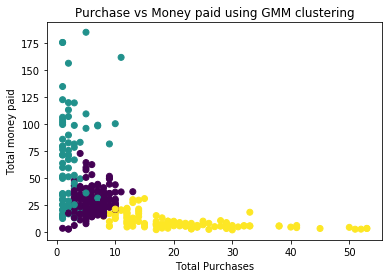

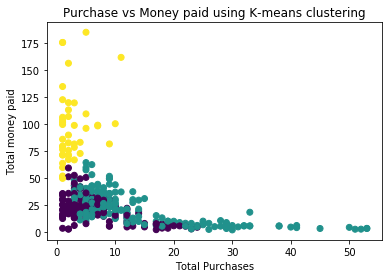

In [40]:
subset = customers[customers['total_gifts'] < 70]
subset = subset[subset['money_paid'] < 200]
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(subset)
labels_gmm = gmm.predict(subset)
kmeans = KMeans(n_clusters= 3, random_state=12).fit(subset)
labels = kmeans.predict(subset)

plt.scatter(subset['total_purchases'], subset['money_paid'], c = labels_gmm)
plt.xlabel('Total Purchases');plt.ylabel('Total money paid')
plt.title('Purchase vs Money paid using GMM clustering')
plt.show()


plt.scatter(subset['total_purchases'], subset['money_paid'], c = labels)
plt.xlabel('Total Purchases');plt.ylabel('Total money paid')
plt.title('Purchase vs Money paid using K-means clustering')
plt.show()


In [41]:
# So Gmm seems to divide the data into 3 distinct groups
# Thus, we are going to stick with this method instead of k-means
subset['labels_gmm'] = labels_gmm

#### Customer Segmentation

Thus, at this point we can observe 3 different groups from the GMM model.

The first group pays high amount of money even if they do not buy items frequently -> High Buyer

The second group is the average buyer who either pays a decent amount or they buy more frequently -> Average Buyer

The third group buys often gifts but their total money spend is low, hence -> Low buyer

### Label Discovery
We have to discovery which label is which and for this reason we are going to plot again each label in different plots to identify their values such as 0 is this group.
Furthermore, we can name those values as we can see from the plot above there is a group which spends the most money and buy less frequently, there is a group which can be stand in the middle average purchases - average total paid money and the last group which tends to buy more frequently and give less money in each purchase.

In [42]:
x = subset
x.head()

,quantity,unitprice,month,day,year,total_purchases,money_paid,money_per_purchase,total_gifts,labels_gmm
customerid,,,,,,,,,,
12353,5,6.075000,5,19,2011,4,30.375000,7.593750,20.0,0
12401,2,8.350000,2,9,2011,4,20.875000,5.218750,10.0,1
12445,20,1.316667,11,17,2011,3,26.333333,8.777778,60.0,0
12506,1,3.195652,4,21,2011,23,3.195652,0.138941,23.0,2
12509,9,3.491667,2,28,2011,6,31.425000,5.237500,54.0,0


(0, 200)

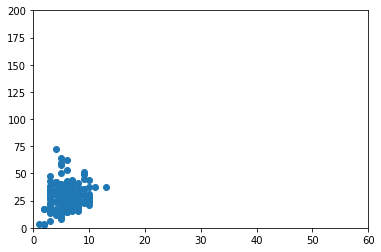

In [43]:
# Label 0 
x = subset[subset['labels_gmm'] == 0]
plt.scatter(x['total_purchases'], x['money_paid'])
plt.xlim(0,60);plt.ylim(0,200)

(0, 200)

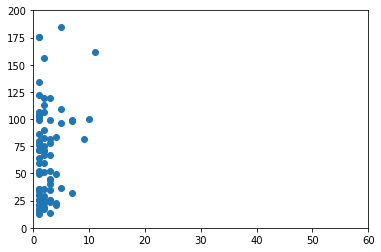

In [44]:
# Label 1
x = subset[subset['labels_gmm'] == 1]
plt.scatter(x['total_purchases'], x['money_paid'])
plt.xlim(0,60);plt.ylim(0,200)

(0, 200)

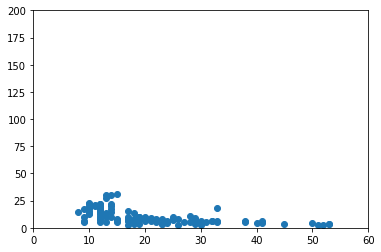

In [45]:
#label 2
x = subset[subset['labels_gmm'] == 2]
plt.scatter(x['total_purchases'], x['money_paid'])
plt.xlim(0,60);plt.ylim(0,200)

In [46]:
# Encoding our labels based on gmm labelling system
# using a function
def labels_encode(my_list):
    if(my_list==1):
        encoded_list=('high_buyer')
    elif(my_list==0):
        encoded_list=('low_buyer')
    elif(my_list==2):
        encoded_list=('avg_buyer')
    return encoded_list

subset['label_encoding'] = subset['labels_gmm'].apply(labels_encode)
subset.head()

,quantity,unitprice,month,day,year,total_purchases,money_paid,money_per_purchase,total_gifts,labels_gmm,label_encoding
customerid,,,,,,,,,,,
12353,5,6.075000,5,19,2011,4,30.375000,7.593750,20.0,0,low_buyer
12401,2,8.350000,2,9,2011,4,20.875000,5.218750,10.0,1,high_buyer
12445,20,1.316667,11,17,2011,3,26.333333,8.777778,60.0,0,low_buyer
12506,1,3.195652,4,21,2011,23,3.195652,0.138941,23.0,2,avg_buyer
12509,9,3.491667,2,28,2011,6,31.425000,5.237500,54.0,0,low_buyer


In [49]:
# Due to the labeling system can change each time we run gmm
# we have encoded and saved those labels based on the above format. 
#Thus, we saved that file and we reload it again 
# in order to avoid missclassification of the labels in potential runs of the script.
subset = pd.read_csv('subset_.csv')
subset.head()

,customerid,quantity,unitprice,month,day,year,total_purchases,money_paid,money_per_purchase,total_gifts,labels_gmm,label_encoding
0,12353,5,6.075000,5,19,2011,4,30.375000,7.593750,20.0,2,avg_buyer
1,12401,2,8.350000,2,9,2011,4,20.875000,5.218750,10.0,2,avg_buyer
2,12445,20,1.316667,11,17,2011,3,26.333333,8.777778,60.0,2,avg_buyer
3,12506,1,3.195652,4,21,2011,23,3.195652,0.138941,23.0,0,low_buyer
4,12509,9,3.491667,2,28,2011,6,31.425000,5.237500,54.0,2,avg_buyer


In [50]:
# After the unsupervised learning technique we are goin to use a Tree classifier
# That could possibly explain the labeling data and find relations between those sub-groups
# Also for the tree we have to exclude the label encoding part as it cannot be as an input
# to the classification tree
subset_ex = subset.drop('label_encoding', axis = 1)
tree_clf = DecisionTreeClassifier(max_depth=3).fit(subset_ex, subset_ex['labels_gmm'])
accuracy = np.sum(tree_clf.predict(subset_ex) == subset['labels_gmm'])/len(subset_ex)*100
print("Accuracy for decision tree is {:.2f} %".format(accuracy))

Accuracy for decision tree is 100.00 %


Classification is 100% so the explanation of the tree would be accurate in terms of fitting to the data

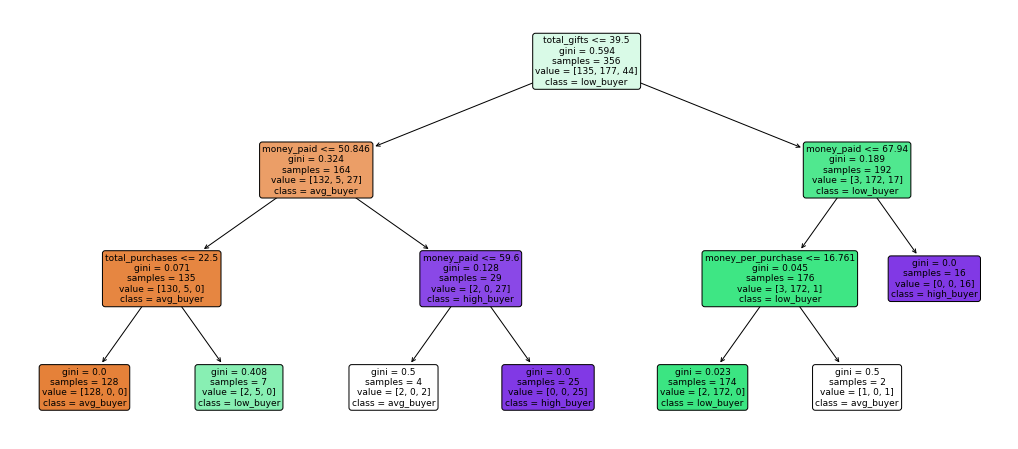

In [51]:
class_names = subset['label_encoding'].unique()
plt.figure(figsize = [18,8])
tree.plot_tree(tree_clf.fit(subset_ex, labels),feature_names= subset.columns, 
               class_names=class_names, rounded=True,
              filled=True)
plt.show()